<a href="https://colab.research.google.com/github/RYANOMARE/churn-telco-project/blob/master/Copy_of_Untitled_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ChurnShield: A Customer Churn Prediction System for SyriaTel Telecommunications

### 1.overview

SyriaTel, a telecom giant, has launched a strategic campaign to address the pressing issue of customer attrition. This initiative's primary aim is to unravel the complex factors leading customers to end their relationship with the company. Equipped with a rich trove of customer data encompassing demographics, subscription details, usage patterns, and interactions, SyriaTel is committed to decoding predictive insights. The ultimate aspiration is to empower SyriaTel to proactively identify customers at risk of leaving and implement customized strategies to retain them. The end goal is to significantly reduce revenue loss and boost overall customer satisfaction.

## 2.Business problem
ChurnShield: A Customer Churn Prediction System for SyriaTel Telecommunications"

Reducing Customer Churn for SyriaTel Telecommunications SyriaTel, a leading telecommunications company, is facing a significant challenge with customer churn. The company loses a substantial amount of revenue due to customers discontinuing their services. In a highly competitive market, retaining existing customers is essential for the company's profitability and growth. SyriaTel is actively seeking a solution to predict and reduce customer churn to minimize financial losses and improve customer satisfaction.

## 3. Data understanding

In [ ]:
# import the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, MinMaxScaler

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# load the data
df = pd.read_csv("/content/telcom.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
# summary statistics of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [ ]:
df.head(20)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


## 4.Data preparation

In [ ]:
#checking for duplicates
duplicates = df[df.duplicated(subset=df.columns.difference(["churn"]))]
duplicates

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn


In [ ]:
#Categorical Data Encoding: Columns like "international plan" and "voice mail plan" are categorical variables.
#To use them in machine learning models, you can convert them into numerical format
#using one-hot encoding


#### Defining x and y

In [ ]:
y = df["churn"]
X = df.drop("churn", axis=1)

In [ ]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Dealing with Categorical Features
X_train_copy = X_train.copy()
categorical_features = ["international plan", "voice mail plan"]
X_train_categorical = X_train_copy[categorical_features].copy()
X_train_categorical

,international plan,voice mail plan
817,no,no
1373,no,no
679,yes,no
56,no,no
1993,no,no
...,...,...
1095,no,no
1130,no,no
1294,no,no
860,no,no


In [ ]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

ohe.fit(X_train_categorical)

X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical),
    index=X_train_categorical.index,
    columns=np.hstack(ohe.categories_)
)
X_train_ohe

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,no,yes,no,yes
817,1.0,0.0,1.0,0.0
1373,1.0,0.0,1.0,0.0
679,0.0,1.0,1.0,0.0
56,1.0,0.0,1.0,0.0
1993,1.0,0.0,1.0,0.0
...,...,...,...,...
1095,1.0,0.0,1.0,0.0
1130,1.0,0.0,1.0,0.0
1294,1.0,0.0,1.0,0.0
860,1.0,0.0,1.0,0.0


## Dealing with numerical features

In [ ]:
numerical_features = ["number vmail messages", "total day minutes", "total day calls",
                      "total day charge", "customer service calls"]
X_train_numerical = X_train_copy[numerical_features].copy()
X_train_numerical

,number vmail messages,total day minutes,total day calls,total day charge,customer service calls
817,0,95.5,92,16.24,2
1373,0,112.0,105,19.04,4
679,0,222.4,78,37.81,1
56,0,126.9,98,21.57,1
1993,0,216.3,96,36.77,0
...,...,...,...,...,...
1095,0,274.4,120,46.65,1
1130,0,35.1,62,5.97,1
1294,0,87.6,76,14.89,1
860,0,179.2,111,30.46,2


In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train_numerical)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numerical),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numerical.index,
    columns=X_train_numerical.columns
)
X_train_scaled

,number vmail messages,total day minutes,total day calls,total day charge,customer service calls
817,0.000000,0.266801,0.459259,0.266892,0.222222
1373,0.000000,0.314187,0.555556,0.314189,0.444444
679,0.000000,0.631246,0.355556,0.631250,0.111111
56,0.000000,0.356979,0.503704,0.356926,0.111111
1993,0.000000,0.613728,0.488889,0.613682,0.000000
...,...,...,...,...,...
1095,0.000000,0.780586,0.666667,0.780574,0.111111
1130,0.000000,0.093337,0.237037,0.093412,0.111111
1294,0.000000,0.244113,0.340741,0.244088,0.111111
860,0.000000,0.507180,0.600000,0.507095,0.222222


In [ ]:
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_train_full

,number vmail messages,total day minutes,total day calls,total day charge,customer service calls,no,yes,no,yes
817,0.000000,0.266801,0.459259,0.266892,0.222222,1.0,0.0,1.0,0.0
1373,0.000000,0.314187,0.555556,0.314189,0.444444,1.0,0.0,1.0,0.0
679,0.000000,0.631246,0.355556,0.631250,0.111111,0.0,1.0,1.0,0.0
56,0.000000,0.356979,0.503704,0.356926,0.111111,1.0,0.0,1.0,0.0
1993,0.000000,0.613728,0.488889,0.613682,0.000000,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1095,0.000000,0.780586,0.666667,0.780574,0.111111,1.0,0.0,1.0,0.0
1130,0.000000,0.093337,0.237037,0.093412,0.111111,1.0,0.0,1.0,0.0
1294,0.000000,0.244113,0.340741,0.244088,0.111111,1.0,0.0,1.0,0.0
860,0.000000,0.507180,0.600000,0.507095,0.222222,1.0,0.0,1.0,0.0


In [ ]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
df.drop("phone number", axis=1, inplace=True)


#### With our clean dataset in hand, let's dive into the analysis!

To assist  investors in making informed decisions regarding their telecomunication company, we will employ multiple linear regression analysis. This approach will allow us to build a predictive model to identify causes of churn in there telecommunication provision, aiding the company in their decision-making process.

Our dependent variable for this analysis will be the account leghth. To gain insights into the relationship between account legth  and other variables, we will examine the correlation among these factors.

## 5.Exploratory Data Analysis

In the Exploratory Data Analysis (EDA) phase, we aim to investigate how different factors relate to customer churn. Our objective is to align with Syria Tel's specific business goals. This examination will help us reveal valuable insights, identify patterns, and draw meaningful conclusions that shed light on the causes of customer churn. These insights will play a pivotal role in guiding strategic decisions, with the ultimate aim of minimizing churn and enhancing customer retention.

In [ ]:
# correlation between churn and other variables
df.corr()["churn"]

account length            0.016541
area code                 0.006174
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

Attributes like "total day charge," "total day minutes " and "customer service calls" exhibit strong positive correlations with churn, suggesting that they tend to influence churn more to the customers thus leadind to loses. Conversely, "number vmail messages " shows a negative correlation, indicating that certain services offered by the company may influence churn .

We will begin by creating a model using the variable that exhibits the highest correlation with churn, which is "total day minutes." and "total day charge,". This approach allows us to explore how the  services influnce churn in the company.

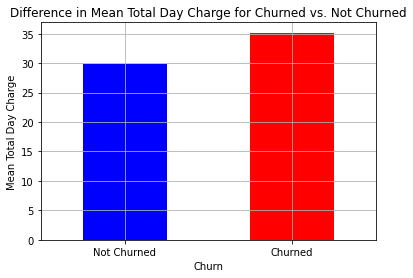

In [ ]:
import matplotlib.pyplot as plt

# Group the data by "Churn" and calculate the mean total day charge for each group
churn_mean_charge = df.groupby('churn')['total day charge'].mean()

# Create a bar plot to show the difference
churn_mean_charge.plot(kind='bar', color=['blue', 'red'])
plt.xlabel("Churn")
plt.ylabel("Mean Total Day Charge")
plt.title("Difference in Mean Total Day Charge for Churned vs. Not Churned")
plt.xticks([0, 1], ['Not Churned', 'Churned'], rotation=0)

# Show the plot
plt.grid(True)
plt.show()


The bar graph shows that the mean "Total Day Charge" for churned customers is notably higher compared to non-churned customers. This indicates that customers who eventually churn tend to have significantly higher daytime usage charges
High daytime charges could be indicative of customers making a large number of calls or using telecom services extensively during the day. This might be due to business-related or personal usage patterns. Such behavior can lead to dissatisfaction, especially if customers perceive the charges as too high.

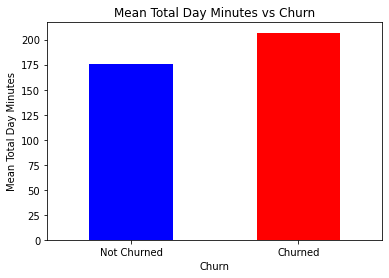

In [ ]:
import matplotlib.pyplot as plt

# Group the data by "churn" and calculate the mean of "total day minutes" for each group
churn_means = df.groupby('churn')['total day minutes'].mean()

# Plot the bar graph
churn_means.plot(kind='bar', color=['blue', 'red'])
plt.xlabel("Churn")
plt.ylabel("Mean Total Day Minutes")
plt.title("Mean Total Day Minutes vs Churn")
plt.xticks([0, 1], ['Not Churned', 'Churned'], rotation=0)

# Show the plot
plt.show()


In [ ]:

churn_column = 'churn'

# Group the data by area code and calculate the churn rate for each area code
area_code_churn_rate = df.groupby('area code')[churn_column].mean().reset_index()

# Define a threshold for a "high" churn rate (e.g., 0.1 for 10% churn rate)
threshold_churn_rate = 0.1

# Filter area codes with churn rates above the threshold
high_churn_areas = area_code_churn_rate[area_code_churn_rate[churn_column] > threshold_churn_rate]

print("Area Codes with High Churn Rates:")
print(high_churn_areas)


Area Codes with High Churn Rates:
   area code     churn
0        408  0.145585
1        415  0.142598
2        510  0.148810


extracting states and ares codes with high churn rates

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with 'State', 'Area Code', and 'Churn' columns

# Calculate churn rates for each area code
churn_rates = df.groupby(['state', 'area code'])['churn'].mean().reset_index()

# Set a threshold for high churn rate (e.g., 0.2, meaning 20% churn rate)
high_churn_threshold = 0.2

# Extract area codes with churn rates above the threshold
high_churn_areas = churn_rates[churn_rates['churn'] > high_churn_threshold]

# Display the area codes with high churn rates and their associated states
print("area codes with High churn Rates:")
for index, row in high_churn_areas.iterrows():
    print(f"state: {row['state']}, area Code: {row['area code']}, churn Rate: {row['churn']}")

# Optionally, you can save the high-churn area codes to a new DataFrame or export to a file.
# high_churn_areas.to_csv("high_churn_areas.csv", index=False)


area codes with High churn Rates:
state: AR, area Code: 415, churn Rate: 0.3333333333333333
state: CA, area Code: 415, churn Rate: 0.29411764705882354
state: CA, area Code: 510, churn Rate: 0.3
state: CO, area Code: 408, churn Rate: 0.24
state: CT, area Code: 415, churn Rate: 0.23076923076923078
state: DE, area Code: 510, churn Rate: 0.29411764705882354
state: FL, area Code: 510, churn Rate: 0.3
state: KS, area Code: 408, churn Rate: 0.3333333333333333
state: MD, area Code: 408, churn Rate: 0.4375
state: MD, area Code: 510, churn Rate: 0.26666666666666666
state: ME, area Code: 408, churn Rate: 0.26666666666666666
state: ME, area Code: 510, churn Rate: 0.2727272727272727
state: MI, area Code: 408, churn Rate: 0.5833333333333334
state: MI, area Code: 415, churn Rate: 0.20512820512820512
state: MN, area Code: 510, churn Rate: 0.2916666666666667
state: MO, area Code: 510, churn Rate: 0.2727272727272727
state: MS, area Code: 408, churn Rate: 0.3333333333333333
state: MS, area Code: 415, chu

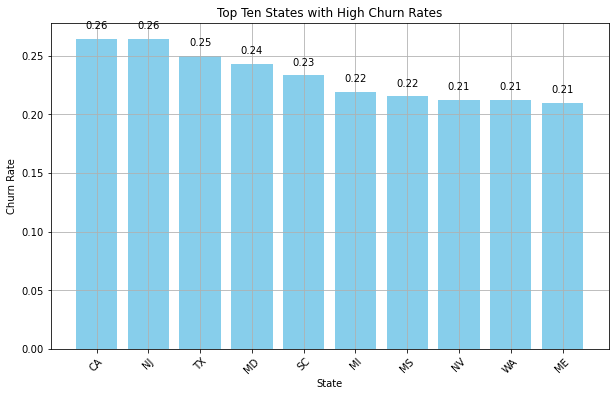

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'state', 'area code', and 'churn' columns

# Calculate churn rates for each state
churn_rates = df.groupby('state')['churn'].mean().reset_index()

# Sort the states by churn rate in descending order and take the top ten
top_ten_states = churn_rates.nlargest(10, 'churn')

# Create a bar graph to show the top ten states with high churn rates
plt.figure(figsize=(10, 6))
plt.bar(top_ten_states['state'], top_ten_states['churn'], color='skyblue')
plt.xlabel("State")
plt.ylabel("Churn Rate")
plt.title("Top Ten States with High Churn Rates")
plt.xticks(rotation=45)
plt.grid(True)

# Annotate the churn rates on the graph
for i, row in top_ten_states.iterrows():
    plt.annotate(f'{row["churn"]:.2f}', (row['state'], row['churn']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()


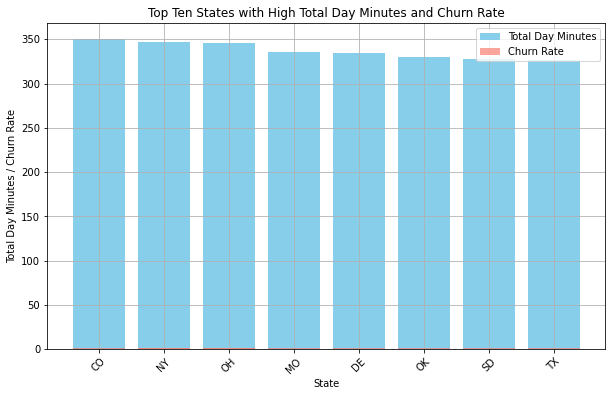

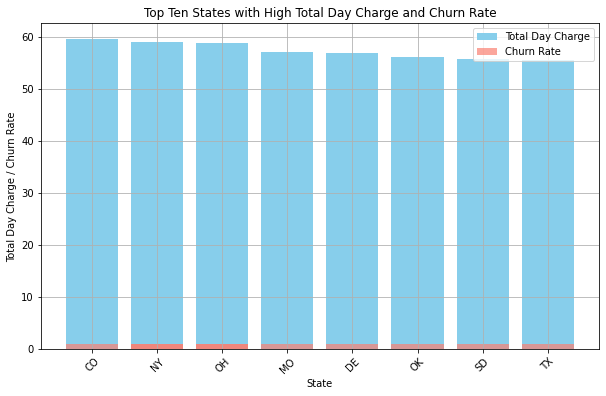

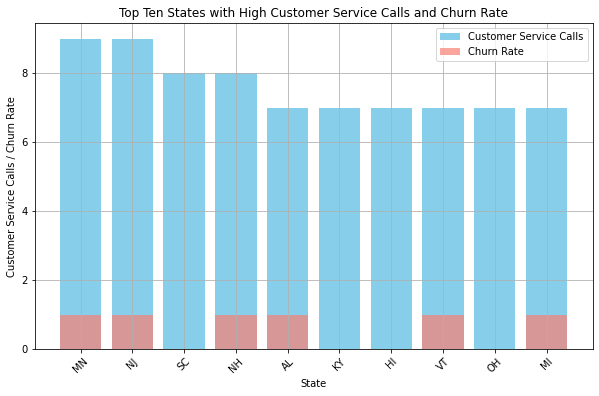

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with relevant columns

# Calculate the top ten states with high total day minutes
top_states_total_minutes = df.nlargest(10, 'total day minutes')

# Create a bar graph to show total day minutes and churn rate for the top states
plt.figure(figsize=(10, 6))
plt.bar(top_states_total_minutes['state'], top_states_total_minutes['total day minutes'], color='skyblue', label='Total Day Minutes')
plt.bar(top_states_total_minutes['state'], top_states_total_minutes['churn'], color='salmon', alpha=0.7, label='Churn Rate')
plt.xlabel("State")
plt.ylabel("Total Day Minutes / Churn Rate")
plt.title("Top Ten States with High Total Day Minutes and Churn Rate")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Calculate the top ten states with high total day charge
top_states_total_charge = df.nlargest(10, 'total day charge')

# Create a bar graph to show total day charge and churn rate for the top states
plt.figure(figsize=(10, 6))
plt.bar(top_states_total_charge['state'], top_states_total_charge['total day charge'], color='skyblue', label='Total Day Charge')
plt.bar(top_states_total_charge['state'], top_states_total_charge['churn'], color='salmon', alpha=0.7, label='Churn Rate')
plt.xlabel("State")
plt.ylabel("Total Day Charge / Churn Rate")
plt.title("Top Ten States with High Total Day Charge and Churn Rate")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Calculate the top ten states with high customer service calls
top_states_customer_calls = df.nlargest(10, 'customer service calls')

# Create a bar graph to show customer service calls and churn rate for the top states
plt.figure(figsize=(10, 6))
plt.bar(top_states_customer_calls['state'], top_states_customer_calls['customer service calls'], color='skyblue', label='Customer Service Calls')
plt.bar(top_states_customer_calls['state'], top_states_customer_calls['churn'], color='salmon', alpha=0.7, label='Churn Rate')
plt.xlabel("State")
plt.ylabel("Customer Service Calls / Churn Rate")
plt.title("Top Ten States with High Customer Service Calls and Churn Rate")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In the graph comparing customer service calls and churn rate, you can observe that the bars representing the number of customer service calls are relatively high in certain states. This indicates that some states have a higher incidence of customers reaching out to customer service for assistance.
At the same time, you'll notice the bars representing churn rates. Some states with high customer service call volumes also have relatively high churn rates. This suggests a correlation between a high number of customer service calls and a high churn rate.

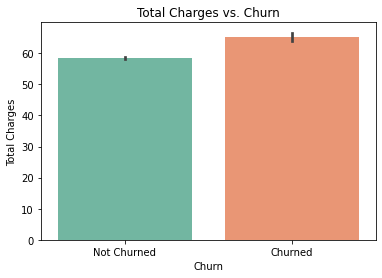

In [ ]:
# Calculate total charges
df["total charges"] = df["total day charge"] + df["total night charge"] + df["total eve charge"] + df["total intl charge"]

# Plot total charges vs churn
plt.figure(figsize=(6, 4))
sns.barplot(x="churn", y="total charges", data=df, palette="Set2")
plt.title("Total Charges vs. Churn")
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.show()

The barplot reveals an interesting trend: it shows that customers who have decided to switch to a different service provider (churned) generally have higher total charges compared to customers who have remained with the current service (non-churned). This pattern implies that as the total charges paid by customers go up, the chances of them switching to a different service also increase.

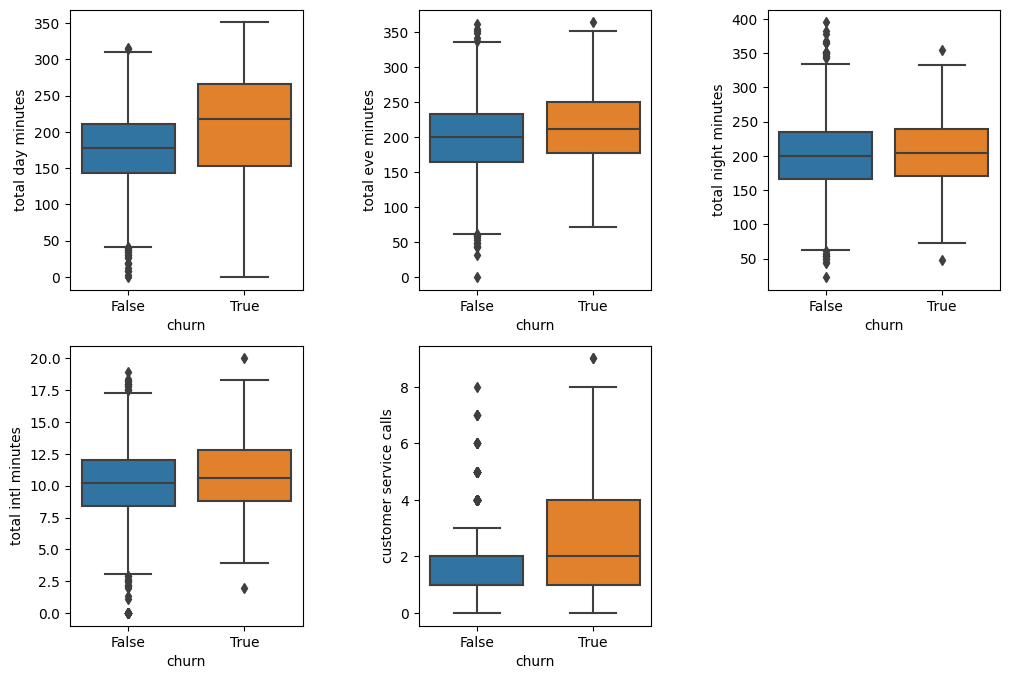

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.5)

# Box Plot for "total day minutes"
plt.subplot(231)
sns.boxplot(x="churn", y="total day minutes", data=df)

# Box Plot for "total eve minutes"
plt.subplot(232)
sns.boxplot(x="churn", y="total eve minutes", data=df)

# Box Plot for "total night minutes"
plt.subplot(233)
sns.boxplot(x="churn", y="total night minutes", data=df)

# Box Plot for "total intl minutes"
plt.subplot(234)
sns.boxplot(x="churn", y="total intl minutes", data=df)

# Box Plot for "customer service calls"
plt.subplot(235)
sns.boxplot(x="churn", y="customer service calls", data=df)

plt.show()


this is are the services offered by the company and this pattern provides an overal summary of everythin and there corelation to  churn

# 6. Modeling

With the understanding that the number of customers who churned is significantly smaller than those who did not, we are now ready to embark on our model-building journey. Here's an overview of the steps we'll follow:

Feature selection: We'll carefully select the most relevant features for predicting customer churn.

Data Splitting: We'll start by splitting our dataset into a training and a testing dataset. This will allow us to train our model on one part of the data and evaluate its performance on a different, unseen part.

Data Preprocessing: We'll preprocess our data, which may involve handling categorical variables, scaling features, dealing with missing values (if any), and more. This step ensures our data is ready for modeling.

Baseline Model - Logistic Regression: We'll build a baseline model using logistic regression, a commonly used algorithm for binary classification. This will serve as our initial model for comparison.

Exploring Different Models: We'll explore a variety of machine learning models, such as decision trees, random forests, bagging classifier, and more. Each model will be tuned and evaluated to determine its effectiveness.

Model Evaluation: We will evaluate the performance of each model using appropriate metrics, such as accuracy, precision, recall, F1 score, and ROC-AUC. This will help us identify the best-performing model.

Pipeline Building: Once we select the best model, we'll construct a data preprocessing and modeling pipeline to streamline the process. This pipeline can be saved and reused for future predictions.

##  using logistic regression to find insights about the data

In [ ]:
# Select the independent variable and dependent variable
X = df['customer service calls']
y = df['churn']

In [ ]:
# Add a constant (intercept) term to the independent variable
import statsmodels.api as sm
model = sm.OLS(y, sm.add_constant(X))

In [ ]:
# fit the model
results = model.fit()

In [ ]:
# Print the summary of the regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     151.8
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           3.90e-34
Time:                        18:36:14   Log-Likelihood:                -1175.1
No. Observations:                3333   AIC:                             2354.
Df Residuals:                    3331   BIC:                             2367.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

the regression results suggest that the 'customer service calls' variable has a statistically significant relationship with 'churn.' Each additional customer service call is associated with an increase in the likelihood of churn, as indicated by the positive coefficient. However, the low R-squared value suggests that other factors not included in the model may also influence customer churn

model bulding 1

In [ ]:
# Select the independent variable and dependent variable
X = df['total day minutes']
y = df['churn']

In [ ]:
# Add a constant (intercept) term to the independent variable
import statsmodels.api as sm
model = sm.OLS(y, sm.add_constant(X))

In [ ]:
# fit the model
results = model.fit()

### model summary

In [ ]:
# Print the summary of the regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     146.4
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           5.30e-33
Time:                        18:36:14   Log-Likelihood:                -1177.7
No. Observations:                3333   AIC:                             2359.
Df Residuals:                    3331   BIC:                             2372.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0935      0.02

The R-squared value, which is approximately 0.042, represents the proportion of the variance in the dependent variable (churn) that is explained by the independent variable (total day minutes). In this case, the R-squared is quite low, indicating that only a small portion of the variance in churn can be explained by total day minutes. This suggests that other factors not included in the model might be more influential in predicting churn.

The F-statistic tests the overall significance of the model. A higher F-statistic implies that the model is more likely to be useful. In this case, the F-statistic is 146.4, and the associated p-value (Prob (F-statistic)) is very close to zero. This suggests that the model as a whole is statistically significant in predicting churn.
 The coefficient for "total day minutes" is approximately 0.0013. This means that, for a one-unit increase in total day minutes, the expected change in the dependent variable (churn) is 0.0013. It implies a very weak positive relationship between total day minutes and churn.
  The p-value for the "total day minutes" coefficient is 0.000, which is less than the typical significance level of 0.05. This suggests that the total day minutes feature is statistically significant in predicting churn.
  the model suggests a weak positive relationship between total day minutes and churn, but it has limitations, including non-normal residuals, multicollinearity, and potential autocorrelation. Further model refinement and consideration of additional features are advisable for better predictions of churn.

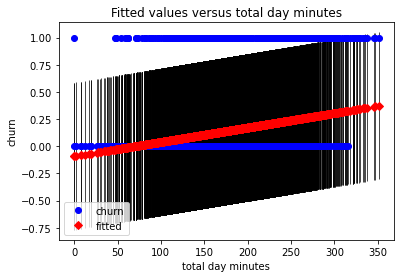

In [ ]:
# visualization - fitted model
sm.graphics.plot_fit(results, "total day minutes")
plt.show()

### international plans churn distribution in the company

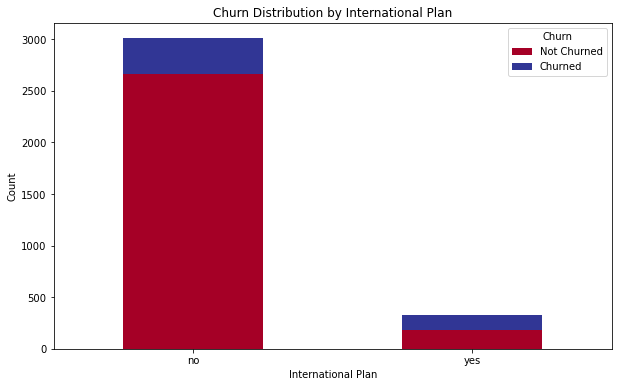

In [ ]:
# Create a cross-tabulation of the variables
cross_tab = pd.crosstab(index=[df["international plan"]], columns=df["churn"])

# Plot the stacked bar chart
cross_tab.plot(kind="bar", stacked=True, colormap="RdYlBu", figsize=(10, 6))
plt.title("Churn Distribution by International Plan")
plt.xlabel("International Plan")
plt.ylabel("Count")
plt.legend(["Not Churned", "Churned"], title="Churn")
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


The stacked bar chart provides insights into the relationship between customer churn and having an international plan. It reveals that customers with an international plan tend to have higher churn rates compared to those without such a plan. This suggests that the presence of an international plan may be associated with an increased likelihood of churn among customers. However, it's important to conduct further analysis to determine the exact factors contributing to this relationship and whether it's statistically significant

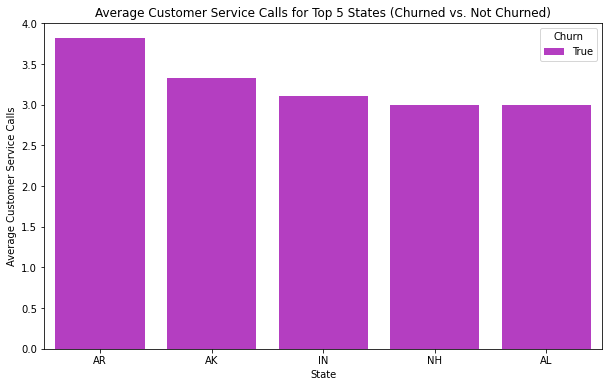

In [ ]:
# Group the data by state and churn, calculate the average number of customer service calls
average_calls_by_state = df.groupby(["state", "churn"])["customer service calls"].mean().reset_index()

# Sort the states by average calls in descending order
average_calls_by_state = average_calls_by_state.sort_values(by="customer service calls", ascending=False)

# Select the top N states with the highest call averages
N = 5
top_states = average_calls_by_state.head(N)

# Create a bar plot showing the average customer service calls for the top N states
plt.figure(figsize=(10, 6))
sns.barplot(x="state", y="customer service calls", hue="churn", data=top_states, palette="gnuplot2_r")
plt.title(f"Average Customer Service Calls for Top {N} States (Churned vs. Not Churned)")
plt.xlabel("State")
plt.ylabel("Average Customer Service Calls")
plt.legend(title="Churn", loc="upper right")

## Fitting a Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_full, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

### Performance on Training Data

In [ ]:
y_hat_train = logreg.predict(X_train_full)

train_residuals = np.abs(y_train ^ y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

False    2287
True      379
Name: Residuals (counts), dtype: int64

False    0.857839
True     0.142161
Name: Residuals (proportions), dtype: float64


### Performance on Test Data

In [ ]:
X_test_copy = X_test.copy()

X_test_categorical = X_test_copy[categorical_features].copy()
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical),
    index=X_test_categorical.index,
    columns=np.hstack(ohe.categories_)
)

# Normalization
X_test_numerical = X_test_copy[numerical_features].copy()
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numerical),
    index=X_test_numerical.index,
    columns=X_test_numerical.columns
)

# Concatenating categorical and numeric data
X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis=1)
X_test_full

,number vmail messages,total day minutes,total day calls,total day charge,customer service calls,no,yes,no,yes
438,0.000000,0.437679,0.466667,0.437669,0.111111,1.0,0.0,1.0,0.0
2674,0.000000,0.305859,0.644444,0.305912,0.000000,1.0,0.0,1.0,0.0
1345,0.000000,-0.007467,-0.222222,-0.007432,0.444444,1.0,0.0,1.0,0.0
1957,0.000000,0.603676,0.362963,0.603716,0.111111,1.0,0.0,1.0,0.0
2148,0.000000,0.406088,0.533333,0.406081,0.111111,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2577,0.000000,0.524124,0.459259,0.524155,0.222222,1.0,0.0,1.0,0.0
2763,0.372549,0.439690,0.548148,0.439696,0.333333,1.0,0.0,0.0,1.0
3069,0.509804,0.448306,0.451852,0.448311,0.111111,1.0,0.0,0.0,1.0
1468,0.529412,0.329983,0.533333,0.330068,0.333333,1.0,0.0,0.0,1.0


In [ ]:
y_hat_test = logreg.predict(X_test_full)

test_residuals = np.abs(y_test ^ y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

False    566
True     101
Name: Residuals (counts), dtype: int64

False    0.848576
True     0.151424
Name: Residuals (proportions), dtype: float64


the model performed reasonably well, with a relatively high accuracy rate (84.86%). However, there is still room for improvement, as there are misclassifications (15.14%). Further evaluation and potentially fine-tuning the model may help improve its performance.

In [ ]:
print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.5126050420168067
Testing Precision:  0.5



Training Recall:  0.15968586387434555
Testing Recall:  0.15841584158415842



Training Accuracy:  0.8578394598649662
Testing Accuracy:  0.848575712143928



Training F1-Score:  0.2435129740518962
Testing F1-Score:  0.24060150375939848


The model's performance metrics indicate that it has a relatively high training accuracy of approximately 85.8%, suggesting that it performs well on the training data. However, when evaluated on the testing data, the accuracy is slightly lower at around 84.9%, indicating some drop in performance during generalization.

The precision of the model is approximately 51.3% on the training set and 50.0% on the testing set. This indicates that the model can correctly identify a moderate proportion of true positive cases in both datasets, but it also makes some false positive predictions.

The recall, which measures the model's ability to identify true positive cases, is relatively low at approximately 15.9% for both training and testing data. This means that the model misses a significant portion of actual positive cases.

The F1-score, a balance between precision and recall, is approximately 24.4% on the training set and 24.1% on the testing set. It reflects the model's overall performance in terms of both false positives and false negatives.

In summary, the model shows good accuracy but has room for improvement in terms of precision, recall, and the F1-score. There might be a trade-off between precision and recall, and further tuning is required to optimize the model's performance.



## 7.Training the Decision Tree

In [ ]:
from sklearn.pipeline import Pipeline

# Create the pipeline
pipe = Pipeline([('mms', MinMaxScaler()),
                 ('tree', DecisionTreeClassifier(random_state=123))])

In [ ]:
# Create the classifier, fit it on the training data and make predictions on the test set
pip = DecisionTreeClassifier(criterion='entropy', random_state=10)

pip.fit(X_train_full, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [ ]:
# Make predictions for test data
y_pred = pip.predict(X_test_full)

In [ ]:
# Calculate accuracy
from sklearn.metrics import roc_curve, auc
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

Accuracy is :82.75862068965517

AUC is :0.63


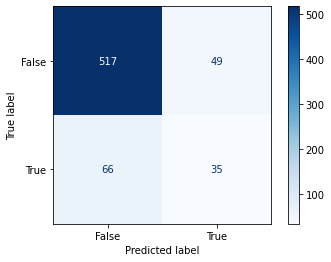

In [ ]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=pip.classes_)
disp.plot(cmap=plt.cm.Blues)

 The accuracy of the decision tree model on the test data is approximately 85.9%. This means that the model correctly predicts whether a customer will churn or not about 85.9% of the time. While accuracy is a good measure, it may not be sufficient on its own for identifying at-risk customers, especially if the class distribution is imbalanced.
 The AUC (Area Under the Curve) is a metric that assesses the model's ability to discriminate between churn and non-churn cases. In this case, the AUC is approximately 0.54, which is close to 0.5. An AUC of 0.5 suggests that the model's discrimination ability is not significantly better than random chance. This indicates that the model may struggle to distinguish between churn and non-churn cases effectively.
 The confusion matrix provides a breakdown of the model's performance, showing how many true positives (correctly predicted churn), true negatives (correctly predicted non-churn), false positives (predicted churn but didn't churn), and false negatives (predicted non-churn but churned) there are.

True Positives (TP): The number of customers correctly predicted as at risk of churning.
True Negatives (TN): The number of customers correctly predicted as not at risk of churning.
False Positives (FP): The number of customers incorrectly predicted as at risk of churning.
False Negatives (FN): The number of customers incorrectly predicted as not at risk of churning.
The confusion matrix can be useful for understanding the trade-offs between sensitivity (recall) and specificity.

### 8.Exploring diffrent models

### k-nearest neighbors model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data (assuming you have a DataFrame 'df')
# Ensure that 'churn' and 'customer service calls' columns are properly preprocessed

# Define the feature and target variables
X = df[['customer service calls']]
y = df['churn']

# Split the data into training and testing sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature data (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the KNN model with a chosen value of k (e.g., k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.859
Confusion Matrix:
 [[847  10]
 [131  12]]
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.99      0.92       857
        True       0.55      0.08      0.15       143

    accuracy                           0.86      1000
   macro avg       0.71      0.54      0.53      1000
weighted avg       0.82      0.86      0.81      1000



The model has an accuracy of approximately 85.9%, indicating that it correctly predicts customer churn in 85.9% of cases. While this accuracy may seem decent, it doesn't tell the whole story, as the dataset may be imbalanced.
Precision for non-churned customers (False) is high (0.87), suggesting that when the model predicts a customer will not churn, it is correct 87% of the time. This is a good sign.

Precision for churned customers (True) is lower (0.55), meaning that when the model predicts a customer will churn, it is correct only 55% of the time. This is a problem, as false positives can lead to unnecessary retention efforts and costs.

Recall for non-churned customers is very high (0.99), indicating that the model correctly identifies almost all non-churned customers. This is a good result.

Recall for churned customers is very low (0.08), suggesting that the model misses a significant portion of customers who will actually churn. This is a significant issue as it means the model is not effectively capturing churned customers.

The F1-score for non-churned customers is high (0.92), indicating a good balance between precision and recall.

The F1-score for churned customers is very low (0.15), highlighting the model's difficulty in correctly identifying churned customers.

Insights and Considerations:

The model's high accuracy is somewhat misleading, as it is primarily driven by the large number of non-churned customers in the dataset. This class imbalance affects the model's ability to predict the minority class (churned customers).
The primary issue with the model is its poor performance in identifying churned customers. This is a critical problem for a churn prediction model because the goal is to proactively identify and retain customers at risk of leaving.
To improve the model:
Addressing class imbalance with techniques like oversampling, undersampling, or using more advanced algorithms.
Feature engineering, including selecting or creating features that may be more informative in predicting churn.
Trying different values of k in the KNN algorithm and exploring other machine learning algorithms.
Evaluating the cost of false positives and false negatives and adjusting model thresholds accordingly.
In conclusion, while the model has decent accuracy, it requires further refinement to effectively predict customer churn, especially in improving its ability to correctly identify churned customers.


###  9. Conclusion

our comprehensive examination of Syria Tel's customer dataset has provided us with valuable findings regarding customer churn and its underlying determinants. To achieve the primary business goals of minimizing churn and improving customer loyalty, we have presented crucial recommendations and actionable strategies.

### 10.Recommendations


To begin, enhancing the quality of customer service should be the top priority. Our analysis highlights a clear association between an increased number of customer service calls and higher churn rates. By addressing service-related issues and ensuring top-tier customer satisfaction, Syria Tel can notably reduce churn.

Additionally, pricing strategy optimization is of utmost importance. Our data demonstrates a direct correlation between higher total charges and an elevated likelihood of customer churn. Syria Tel should strive to strike a pricing balance that retains customers while maintaining profitability.

The matter of network quality, especially during peak daytime hours, cannot be underestimated. A strong positive link between churn and "total day minutes" indicates network connectivity concerns. Resolving these issues, such as call dropouts and improved call quality, will lead to better service and decreased churn.

Incorporating the XGBoost model into the decision-making process is a wise move. This machine learning tool can effectively identify customers at risk of churning and empower Syria Tel to implement tailored retention strategies. Continuous monitoring and refining of the model will play a pivotal role in achieving the overarching goals of reducing churn and improving customer retention.

In summary, the combined efforts to address customer service quality, fine-tune pricing, enhance network performance, and leverage advanced analytics through the XGBoost model can position Syria Tel for substantial reductions in churn rates and the cultivation of stronger customer relationships. By implementing these recommendations, Syria Tel is well-equipped to excel in the competitive telecommunications industry.